In [2]:
import pandas as pd
df = pd.read_csv("salary.csv")
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [3]:
from sklearn.preprocessing import LabelEncoder

In [7]:
lb =LabelEncoder()
lb1=LabelEncoder()
lb2 =LabelEncoder()

In [11]:
df['company_n']=lb.fit_transform(df.company)
df['job_n']=lb.fit_transform(df.job)
df['degree_n']=lb.fit_transform(df.degree)

In [12]:
df

,company,job,degree,salary_more_then_100k,company_n,job_n,degree_n
0,google,sales executive,bachelors,0,2,2,0
1,google,sales executive,masters,0,2,2,1
2,google,business manager,bachelors,1,2,0,0
3,google,business manager,masters,1,2,0,1
4,google,computer programmer,bachelors,0,2,1,0
5,google,computer programmer,masters,1,2,1,1
6,abc pharma,sales executive,masters,0,0,2,1
7,abc pharma,computer programmer,bachelors,0,0,1,0
8,abc pharma,business manager,bachelors,0,0,0,0
9,abc pharma,business manager,masters,1,0,0,1


In [41]:
new_df = df.drop(['company','job','degree'],axis='columns')
new_df

,salary_more_then_100k,company_n,job_n,degree_n
0,0,2,2,0
1,0,2,2,1
2,1,2,0,0
3,1,2,0,1
4,0,2,1,0
5,1,2,1,1
6,0,0,2,1
7,0,0,1,0
8,0,0,0,0
9,1,0,0,1


In [47]:
pd.DataFrame(new_df)
new_df.rename(columns={'salary_more_then_100k':'target'},inplace=True)

In [49]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [58]:
target=new_df['target']

In [59]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: target, dtype: int64

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(new_df,target,test_size=0.3)

In [69]:
x_train

,company_n,job_n,degree_n
10,1,2,0
8,0,0,0
6,0,2,1
13,1,0,1
12,1,0,0
0,2,2,0
1,2,2,1
11,1,2,1
5,2,1,1
3,2,0,1


In [70]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [71]:
import seaborn as sns

In [72]:
from sklearn import metrics

In [75]:
y_pred =model.predict(x_test)
y_pred

array([1, 0, 1, 1, 1], dtype=int64)

In [76]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)

In [77]:
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels=[False,True])

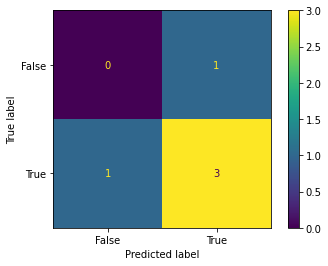

In [78]:
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

In [80]:
metrics.precision_score(y_pred,y_test)

0.75

In [82]:
model.score(x_test,y_pred)

1.0